# Day 6:30 daily statistics - ***Detecção de Heterocedasticiade***

Ao se estudar os modelos lineares temos que ter atenção especial ao comportamento dos resíduos do modelo encontrado. Existem exigências que devem ser atendidas para que o modelo estimado possa proporcionar melhores resultados para um tomador de decisão, ou seja, é necessário que os parâmetros que irão fazer parte do modelo possam ser considerados significativos e que os resíduos possam ser considerados independentes e identicamente distribuídos, algo que a literatura chama de $IID$. Portanto caso o modelo não atenda a algumas das suposições de normalidade, homocedasticidade e independência nos resíduos o modelo não poderá ser utilizado para que sejam feitas inferências e nem tomadas de decisões antes que estes problemas sejam avaliados e corrigidos. No estudo de hoje irei estudar um conjunto de dados que apresenta o problema de falta de homocedasticidade (heterocedasticidade, ou seja, a variância dos resíduos não é constante), e aplicarei alguns testes do conjunto de dados a fim de resolver o problema da Heterocedasticidade nos resíduos.

Na análise dos resíduos de um modelo de regressão linear é um pressuposto básico a existência de variância constante, ou seja, é exigido que os resíduos tenham um comportamento ***homocedastico***. Se os resíduos não tiverem variância constante, dizemos que eles são ***heterocedasticos***, portanto é necessário respondermos a algumas perguntas para a detecção da ***heterocedasticidade***.

+ Como deterctamos esse problema nos resíduos;
+ Quais são as consequências nas propriedades dos estimadores de mínimos quadrados, e quais são as consequências nos erros padrão estimados se usarmos o método de mínimos quadrados ordinários?
+ Quais são as soluções desse problema? 

In [1]:
y=c(19.9, 31.2, 31.8, 12.1, 40.7, 6.1, 38.6, 25.5, 10.3, 38.8, 8, 33.1, 33.5, 13.1, 14.8, 21.6, 29.3, 25, 17.9, 19.8)
x=c(22.3, 32.3, 36.6, 12.1, 42.3, 6.2, 44.7, 26.1, 10.3, 40.2, 8.1,34.5, 38, 14.1, 16.4, 24.1, 30.1, 28.3, 18.2, 20.1)
dados=data.frame(y,x)
dados

y,x
19.9,22.3
31.2,32.3
31.8,36.6
12.1,12.1
40.7,42.3
6.1,6.2
38.6,44.7
25.5,26.1
10.3,10.3
38.8,40.2


In [2]:
#ajuste do modelo

ajuste=lm(y~x,data=dados)
summary(ajuste)


Call:
lm(formula = y ~ x, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.44687 -0.94108  0.02916  1.19199  1.81151 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.84705    0.70335   1.204    0.244    
x            0.89932    0.02531  35.534   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.314 on 18 degrees of freedom
Multiple R-squared:  0.9859,	Adjusted R-squared:  0.9852 
F-statistic:  1263 on 1 and 18 DF,  p-value: < 2.2e-16


O modelo encontrado possui o seguinte modelo de previsão $\hat{y}=0.84705+0.89932x$. Ainda é possível afirmar que além do modelo explicar 98,59% da variabilidade que é inerente ao processo o modelo é considerado significativo, pois o p-valor foi menor do que 0,05. 

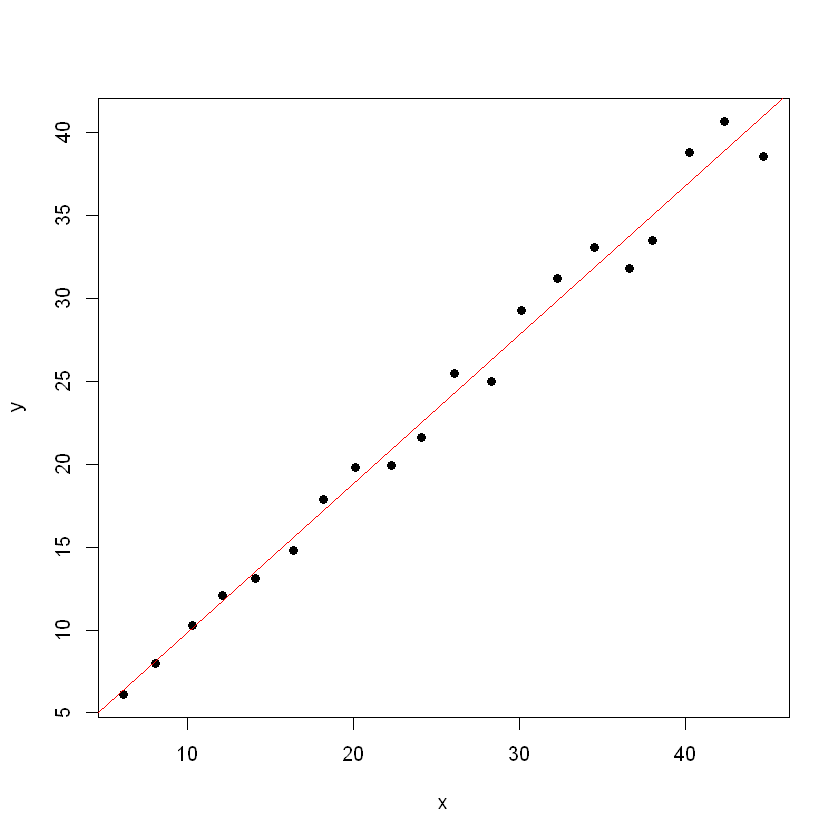

In [3]:
#Gráfico para o modelo estimado

plot(y~x,pch=16,data=dados)
abline(ajuste,col="red")

Neste momento pode-se dizer que o modelo é excelente, possui um coeficiente de determianção de 98,59%, o modelo de previsão encontrado foi considerado signficativo e graficamente o modelo ajusta-se muito bem aos dados. No entanto para usarmos o modelo para realizar ***previsões*** e tomadas de decisões deve-se avaliar os resíduos do modelo encontrado. Primeiramente realizaremos uma análise gráfica para termos idéia da existência de problemas nos resíduso e o que deve-se fazer para concortar tais problemas.

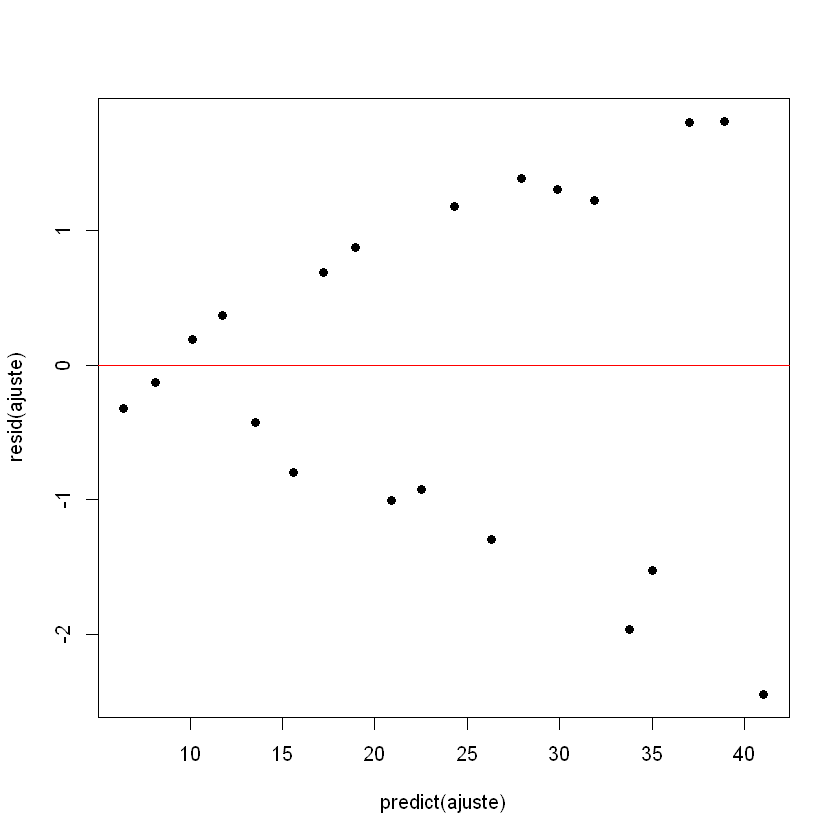

In [4]:
#Gráfico para os resíduos
plot(resid(ajuste)~predict(ajuste),pch=16)
abline(0,0,col="red")

O gráfico dos valores previstos pelos resíduso mostra a existência da falta de homogeneidade da variância nos resíduos (a variância não é constante nos resíduos), formando um gráfico em forma de V. Tal gráfico indica a presença da ***heterocedasticidade*** nos resíduos.

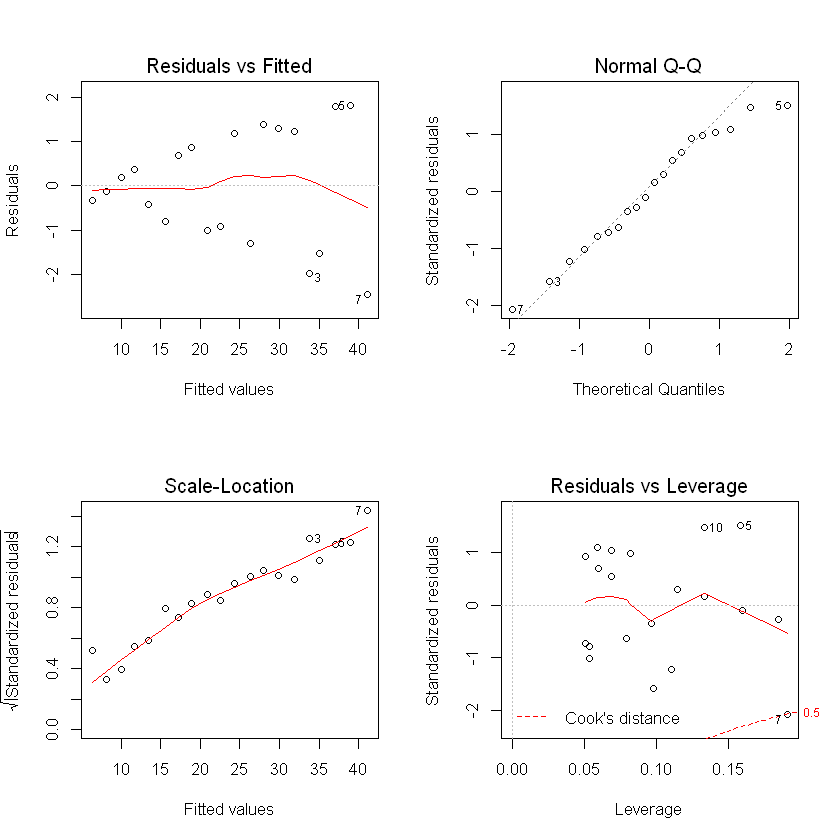

In [5]:
#Continuando a análise nos resíduos
par(mfrow=c(2,2))
plot(ajuste)

Com o problema da ***heterocedasticidade*** em nossas mãos devemos nos concentrar para resolve-lo. Em algumas situações mais simples o problema da ***heteroedasticidade*** é resolvido pela estimação da regressão em uma forma ***log-linear***, o seja,  Quando regredimos ***log y em log x***, este tipo de modelagem é conhecida como **modelo log-log**.

In [6]:
#usando o log x e log y para tentar resolver o problema da homocedasticidade nos resíduso
dados2=data.frame(log(y),log(x))
ajuste2=lm(log(y)~log(x),data=dados2)
summary(ajuste2)


Call:
lm(formula = log(y) ~ log(x), data = dados2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05852 -0.04762  0.01503  0.04106  0.05072 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.07567    0.05739   1.318    0.204    
log(x)       0.95619    0.01825  52.380   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04569 on 18 degrees of freedom
Multiple R-squared:  0.9935,	Adjusted R-squared:  0.9931 
F-statistic:  2744 on 1 and 18 DF,  p-value: < 2.2e-16


O novo modelo encontrado ainda é significativo (p-valor < 0,05), com um coeficiente de determinação de 99,35%. Uma observação importante é que a comparação entre os dois coeficientes de determinação encontrados ($R^2=98,6$) para a primeira regressão e o coeficiente de ($R^2=99,35%$) para a segunda equação não deverá ser realizada, visto que a variância da variável dependente é diferente em ambos os modelos. A discussão da comparação entre coeficientes de determinação da forma linear versus os da forma log-linear deve ser feito com cautela e não entrarei nesta análise neste estudo, ficando para um próximo #day statistics#. Para validar o modelo encontrado precisaremos realizar uma nova análise nos resíduos para o modelo log-linear.

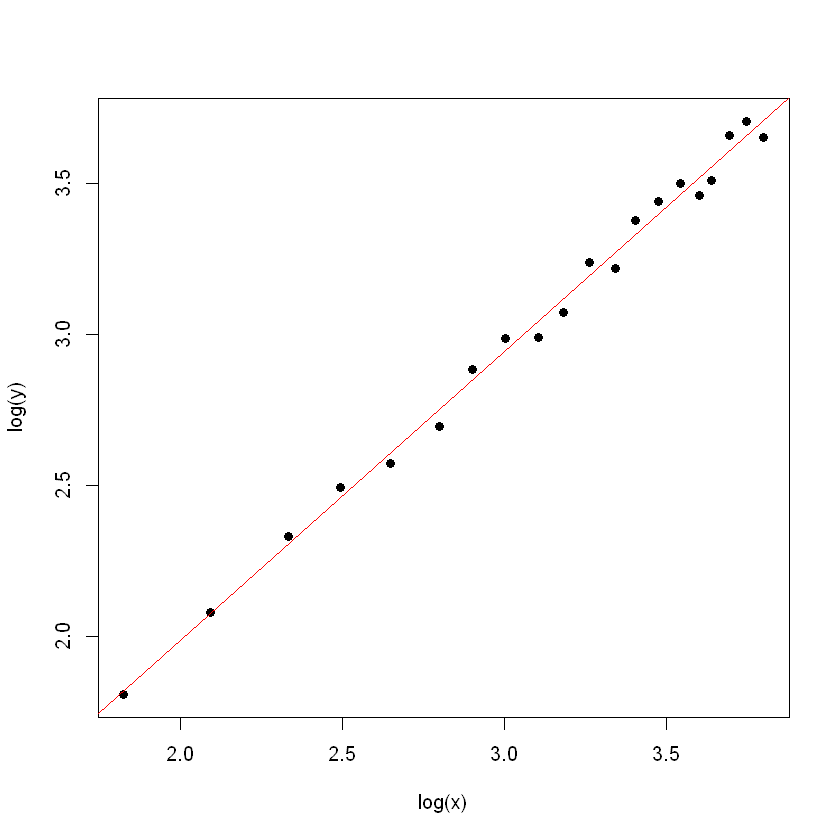

In [7]:
#Grafico
plot(log(y)~log(x),pch=16,data=dados2)
abline(ajuste2,col="red")

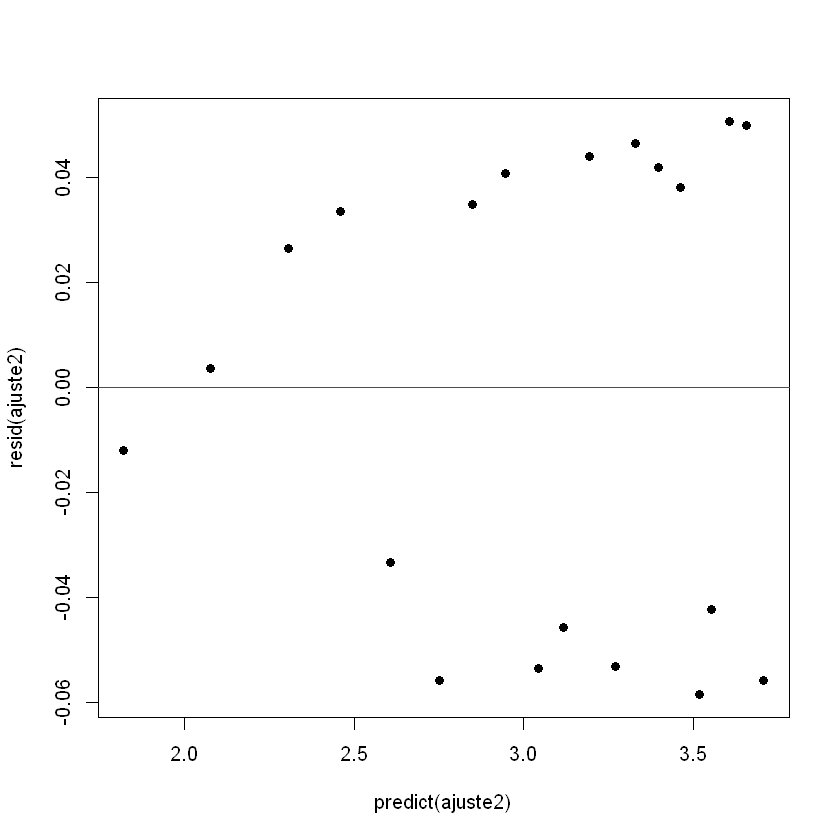

In [8]:
#Análise dos resíduos 

plot(resid(ajuste2)~predict(ajuste2),pch=16)
abline(0,0,col="red")

O gráfico acima ainda nos apresenta a presença da heterocedasticidade nos resíduos (a variância nos resíduos não é constante). Existem três soluções que são comumente sugeridas para tentar solucionar o problema da heterocedasticidade nos residuos:

+ Usar os mínimos quadrados ponderados;
+ Deflacionar a série por meio de alguma medida de "tamanho";
+ Transformar a série para a forma logarítmica. 

Em se tratando de detecção, a literatura estatística aponta além dos métodos gráficos para a detecção da heterocedasticidade, alguns testes, tais como: Teste de Ramsey, Teste de Glejser, Teste Goldfeld-Quandt, Teste de Breusch-Pagan, Teste de White e o Teste de razão de Verossimilhança. O teste de Breusch-Pagan é feito através da biblioteca **`lmtest`** e **`zoo`**, com o uso do comando `bptest( )`.

In [9]:
#Teste de heterocedasticidade nos resíduos pelo teste de Breusch-Pagan
require(lmtest)
require(zoo)
bptest(ajuste2)

Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




	studentized Breusch-Pagan test

data:  ajuste2
BP = 11.607, df = 1, p-value = 0.0006569


Ao se usar o Teste de Breusch-Pagan a hipótese associada ao teste é apresentada a seguir:

$\begin{eqnarray}
H_0: \sigma_1^2 &=&    \sigma_1^2\\
H_1: \sigma_1^2 &\neq&  \sigma_1^2\\
\end{eqnarray}
$

Portanto, de acordo com o p-valor associado encontrado, possuímos fortes evidências amostrais para rejeitarmos a hipótese nula, ou seja, existe a presença de heterocedasticidade pelo teste de Breusch-Pagan - (Como 0.0006569 < 0.05, nós rejeitamos a hipótese nula de homocedasticidade).  Em uma próxima rodada de estudos apresentarei o método de mínimos quadrados ponderados como candidato para a solução do problema da falta de constância nos resíduos.